In [2]:
#housekeeping and essential imports
import pandas as pd
import os

pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 1800)
pd.set_option ('display.max_colwidth', 150)
pd.set_option('display.max_columns', 50)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# surpress warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: None#1px dotted lightgrey;
}

In [5]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-dark-palette')
#plt.style.use('seaborn')

# Get readcounts from `STAR quantmode`

In [6]:
os.chdir('/gpfs/commons/groups/sanjana_lab/cdai/TFscreen/data/20190816/star/counts/')

In [8]:
import glob

In [17]:
count_tab = glob.glob('*.ReadsPerGene.out.tab')
count_tab.sort()

In [18]:
count_tab

['S01.ReadsPerGene.out.tab',
 'S02.ReadsPerGene.out.tab',
 'S03.ReadsPerGene.out.tab',
 'S04.ReadsPerGene.out.tab',
 'S05.ReadsPerGene.out.tab',
 'S06.ReadsPerGene.out.tab',
 'S07.ReadsPerGene.out.tab',
 'S08.ReadsPerGene.out.tab',
 'S09.ReadsPerGene.out.tab',
 'S10.ReadsPerGene.out.tab',
 'S11.ReadsPerGene.out.tab',
 'S12.ReadsPerGene.out.tab',
 'S13.ReadsPerGene.out.tab',
 'S14.ReadsPerGene.out.tab',
 'S15.ReadsPerGene.out.tab',
 'S16.ReadsPerGene.out.tab',
 'S17.ReadsPerGene.out.tab',
 'S18.ReadsPerGene.out.tab',
 'S19.ReadsPerGene.out.tab',
 'S20.ReadsPerGene.out.tab',
 'S21.ReadsPerGene.out.tab',
 'S22.ReadsPerGene.out.tab',
 'S23.ReadsPerGene.out.tab',
 'S24.ReadsPerGene.out.tab',
 'S25.ReadsPerGene.out.tab',
 'S26.ReadsPerGene.out.tab',
 'S27.ReadsPerGene.out.tab']

In [124]:
# read in readcounts and save all in dataframe
cnts=pd.DataFrame([])
for tab in count_tab:
    sample_name = tab.split('.')[0]
    df = pd.read_csv(tab, sep='\t', skiprows=4, header=None, names=['gene_id','cnt','cnt1','cnt2'])
    cnts[sample_name] = df.cnt
    idx = df.gene_id
cnts.set_index(idx, inplace=True)

In [184]:
cnts.head()

,S01,S02,S03,S04,S05,S06,S07,S08,S09,S10,S11,S12,S13,S14,S15,S16,S17,S18,S19,S20,S21,S22,S23,S24,S25,S26,S27
gene_id,,,,,,,,,,,,,,,,,,,,,,,,,,,
ENSG00000223972.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ENSG00000227232.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ENSG00000278267.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ENSG00000243485.5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ENSG00000284332.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [138]:
cnts.iloc[:,0:22].to_csv('TFsc_rnaseq_cnts.csv') # save for Congyi's 22 samples

In [143]:
cnts.iloc[:,22:27].to_csv('rnaseq_flen.csv') # save for Chao's 5 samples

In [199]:
del(df2)

In [226]:
df2 = pd.read_csv('HighlyExpressedGenes.csv')

In [207]:
pwd

'/gpfs/commons/groups/sanjana_lab/cdai/TFscreen/data/20190816/star/counts'

In [209]:
ls -l *.csv

-rw-rw-r-- 1 cdai nslab 1478037 Aug 23 15:30 HighlyExpressedGenes.csv
-rw-rw-r-- 1 cdai nslab 1755724 Aug 22 22:11 rnaseq_flen.csv
-rw-rw-r-- 1 cdai nslab 4150093 Aug 22 22:09 TFsc_rnaseq_cnts.csv


# read counts of genes meeting certain criteria (from R notebook, min 2 samples each having min 5 reads)

In [227]:
df2.head()
df2.shape

,S01,S02,S03,S04,S05,S06,S07,S08,S09,S10,S11,S12,S13,S14,S15,S16,S17,S18,S19,S20,S21,S22
ENSG00000268903.1,3,1,14,5,0,0,0,7,0,2,33,0,0,0,0,4,0,0,0,0,0,0
ENSG00000225972.1,7,1,9,1,4,1,1,5,3,1,6,3,7,35,0,18,3,1,4,1,2,6
ENSG00000225630.1,45,41,37,53,32,17,3,30,35,18,3,12,264,5,78,114,2,211,51,3,11,34
ENSG00000248527.1,5157,7617,7441,4834,4620,4847,1766,3031,2902,1532,4335,5296,5244,2241,3428,6053,4469,5969,2882,1574,2425,2708
ENSG00000198744.5,3,7,8,4,5,2,1,2,1,1,2,6,3,0,24,4,0,0,4,4,0,2


(17688, 22)

In [228]:
df2.reset_index(inplace=True)

In [229]:
df2.rename(columns={'index':'gene_id'}, inplace=True)

In [27]:
gene_lookup.head()

NameError: name 'gene_lookup' is not defined

In [231]:
df2 = pd.merge(df2,gene_lookup, how='inner', on='gene_id')

In [232]:
df2.columns

Index(['gene_id', 'S01', 'S02', 'S03', 'S04', 'S05', 'S06', 'S07', 'S08', 'S09', 'S10', 'S11', 'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18', 'S19', 'S20', 'S21', 'S22', 'gene_name'], dtype='object')

In [233]:
df2=df2[['gene_id','gene_name', 'S01', 'S02', 'S03', 'S04', 'S05', 'S06', 'S07', 'S08', 'S09', 'S10', 'S11', 
         'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18', 'S19', 'S20', 'S21', 'S22']]

In [224]:
cd counts/

/gpfs/commons/groups/sanjana_lab/cdai/TFscreen/data/20190816/star/counts


In [235]:
df2.to_csv('HighlyExpressedGenes.csv', index=False)

In [234]:
df2.head()

,gene_id,gene_name,S01,S02,S03,S04,S05,S06,S07,S08,S09,S10,S11,S12,S13,S14,S15,S16,S17,S18,S19,S20,S21,S22
0,ENSG00000268903.1,AL627309.6,3,1,14,5,0,0,0,7,0,2,33,0,0,0,0,4,0,0,0,0,0,0
1,ENSG00000225972.1,MTND1P23,7,1,9,1,4,1,1,5,3,1,6,3,7,35,0,18,3,1,4,1,2,6
2,ENSG00000225630.1,MTND2P28,45,41,37,53,32,17,3,30,35,18,3,12,264,5,78,114,2,211,51,3,11,34
3,ENSG00000248527.1,MTATP6P1,5157,7617,7441,4834,4620,4847,1766,3031,2902,1532,4335,5296,5244,2241,3428,6053,4469,5969,2882,1574,2425,2708
4,ENSG00000198744.5,MTCO3P12,3,7,8,4,5,2,1,2,1,1,2,6,3,0,24,4,0,0,4,4,0,2


In [181]:
df2.groupby('gene_name').sum().head()

,S01,S02,S03,S04,S05,S06,S07,S08,S09,S10,S11,S12,S13,S14,S15,S16,S17,S18,S19,S20,S21,S22
gene_name,,,,,,,,,,,,,,,,,,,,,,
AAAS,169,200,113,48,178,168,80,97,135,68,168,149,92,92,62,117,19,55,51,78,85,34
AACS,126,170,140,126,97,180,158,205,181,39,132,137,161,171,104,157,41,72,201,263,87,94
AAGAB,180,96,107,94,99,95,197,118,125,49,165,136,220,293,231,120,212,237,220,319,120,240
AAK1,44,48,75,44,39,59,164,177,84,48,221,139,98,45,49,40,120,118,34,122,286,228
AAMDC,88,77,55,58,126,130,105,119,71,36,48,46,101,142,145,67,87,83,78,81,49,12


In [174]:
df2.groupby('gene_name')['gene_id'].size().sort_values(ascending=False)

gene_name
HSPA14     2
ZYX        1
GORASP2    1
GOLGA8A    1
GOLGB1     1
          ..
PUM3       1
PURB       1
PUS1       1
PUS3       1
AAAS       1
Name: gene_id, Length: 7008, dtype: int64

# All read counts adding gene names, export to csv

In [237]:
df3 = pd.read_csv('TFsc_rnaseq_cnts.csv')

In [249]:
df3.head()

,gene_id,gene_name,S01,S02,S03,S04,S05,S06,S07,S08,S09,S10,S11,S12,S13,S14,S15,S16,S17,S18,S19,S20,S21,S22
0,ENSG00000223972.5,DDX11L1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,ENSG00000227232.5,WASH7P,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,ENSG00000278267.1,MIR6859-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,ENSG00000243485.5,MIR1302-2HG,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,ENSG00000284332.1,MIR1302-2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [239]:
df3.reset_index(inplace=True)

In [240]:
df3.rename(columns={'index':'gene_id'}, inplace=True)

In [241]:
df3 = pd.merge(df3,gene_lookup, how='inner', on='gene_id')

In [244]:
df3=df3[['gene_id','gene_name', 'S01', 'S02', 'S03', 'S04', 'S05', 'S06', 'S07', 'S08', 'S09', 'S10', 'S11', 
         'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18', 'S19', 'S20', 'S21', 'S22']]

In [247]:
df3.groupby('gene_name')['gene_id'].size().sort_values(ascending=False)

gene_name
RF00019     758
RF00017     170
RF00012      51
RF00026      37
RF02271      36
           ... 
MRFAP1L1      1
MRFAP1        1
MREGP1        1
MREG          1
A1BG          1
Name: gene_id, Length: 59087, dtype: int64

In [250]:
df3.to_csv('RNAseq_allgene_cnts.csv', index=False)

# read counts for genes in the intersection of td-/td+ vs. td-/dox 120 genes, export csv

In [263]:
intersection120_genes = pd.read_csv('/c/groups/sanjana_lab/cdai/TFscreen/HS_td-VStd+_td-VSdox120.csv', header=None)[0]

In [282]:
df4 = df3[df3.gene_name.isin(intersection120_genes)]

In [285]:
df4.head()

,gene_id,gene_name,S01,S02,S03,S04,S05,S06,S07,S08,S09,S10,S11,S12,S13,S14,S15,S16,S17,S18,S19,S20,S21,S22
152,ENSG00000157933.10,SKI,117,151,128,135,185,123,99,183,109,81,47,78,141,180,119,84,35,93,122,161,37,132
234,ENSG00000116254.18,CHD5,0,0,1,0,0,1,0,0,0,0,4,2,2,1,0,2,0,0,0,0,0,2
618,ENSG00000009709.12,PAX7,0,0,1,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,3,1,0
4079,ENSG00000121454.6,LHX4,11,0,12,0,13,0,76,41,17,15,57,22,0,1,6,0,0,0,12,0,60,103
5300,ENSG00000179456.10,ZBTB18,60,44,43,13,32,101,648,813,1312,369,883,1237,6,0,594,533,549,532,862,1261,363,534


In [289]:
a=set(df3[df3.gene_name.isin(intersection120_genes)].gene_name)
b=set(intersection120_genes)

b.difference(a) # notice two genes are have no reads (not passing filter) in RNAseq

{'NBPF24', 'ZZZ3'}

In [288]:
df4.to_csv('RNAseq_tdNeg_120GeneSet_counts.csv', index=False)

---

In [290]:
!cp 'RNAseq_tdNeg_120GeneSet_counts.csv' /c/groups/sanjana_lab/cdai/TFscreen/syncClusterCloud/

In [291]:
!bash /c/groups/sanjana_lab/cdai/TFscreen/pushDropbox.sh

In [299]:
ls ../../rsem/

ENCODE_STAR_RSEM_pipeline.sh  S04.stat/             S08.time
RSEM.out                      S04.time              S09.genes.results
rsem.sh                       S05.genes.results     S09.isoforms.results
S01.genes.results             S05.isoforms.results  S09.stat/
S01.isoforms.results          S05.stat/             S09.time
S01.stat/                     S05.time              S10.genes.results
S01.time                      S06.genes.results     S10.isoforms.results
S02.genes.results             S06.isoforms.results  S10.stat/
S02.isoforms.results          S06.stat/             S10.time
S02.stat/                     S06.time              S11.genes.results
S02.time                      S07.genes.results     S11.isoforms.results
S03.genes.results             S07.isoforms.results  S11.stat/
S03.isoforms.results          S07.stat/             S11.time
S03.stat/                     S07.time              S12.stat/
S03.time                      S08.genes.results     S12.temp/
S04.genes.results

In [300]:
r1 = pd.read_csv('../../rsem/S01.genes.results', sep='\t')

In [356]:
r1[['gene_id','length','effective_length','expected_count','TPM']].head(10)

,gene_id,length,effective_length,expected_count,TPM
0,ENSG00000000003.14,2231.13,2182.98,684.70,62.66
1,ENSG00000000005.6,1205.00,1156.85,7.00,1.21
2,ENSG00000000419.12,837.27,789.13,643.05,162.79
3,ENSG00000000457.14,6308.00,6259.85,10.46,0.33
4,ENSG00000000460.17,3321.11,3272.96,97.54,5.95
5,ENSG00000000938.13,1722.14,1673.99,0.00,0.00
6,ENSG00000000971.15,2587.83,2539.68,0.00,0.00
7,ENSG00000001036.13,2291.67,2243.52,175.01,15.58
8,ENSG00000001084.13,3592.32,3544.17,94.00,5.30
9,ENSG00000001167.14,3811.00,3762.85,105.00,5.57


In [352]:
r2 = pd.read_csv('../../rsem/S02.genes.results', sep='\t')

In [357]:
r2[['gene_id','length','effective_length','expected_count','TPM']].head(10)

,gene_id,length,effective_length,expected_count,TPM
0,ENSG00000000003.14,2209.99,2161.58,607.00,59.38
1,ENSG00000000005.6,873.50,825.09,0.00,0.00
2,ENSG00000000419.12,987.72,939.31,618.98,139.34
3,ENSG00000000457.14,6308.00,6259.59,33.44,1.13
4,ENSG00000000460.17,2322.68,2274.27,93.56,8.70
5,ENSG00000000938.13,1722.14,1673.74,0.00,0.00
6,ENSG00000000971.15,2587.83,2539.43,0.00,0.00
7,ENSG00000001036.13,2315.03,2266.62,170.00,15.86
8,ENSG00000001084.13,2436.60,2388.20,139.00,12.31
9,ENSG00000001167.14,3811.00,3762.59,127.00,7.14


In [358]:
t1 = pd.read_csv('../../rsem/S01.isoforms.results', sep='\t')

# RSEM read counts

Gene_id to Gene_name lookup table

In [6]:
gene_lookup = pd.read_csv('/c/groups/sanjana_lab/cdai/ref_genome/gencode.v31.primary_assembly.annotation.gene_idTOgene_name.txt')

In [8]:
os.chdir('/gpfs/commons/groups/sanjana_lab/cdai/TFscreen/data/HFJM7BGXC/rsem_output/')

In [37]:
ls *.genes.results

S10.genes.results  S16.genes.results  S21.genes.results  S6.genes.results
S11.genes.results  S17.genes.results  S22.genes.results  S7.genes.results
S12.genes.results  S18.genes.results  S2.genes.results   S8.genes.results
S13.genes.results  S19.genes.results  S3.genes.results   S9.genes.results
S14.genes.results  S1.genes.results   S4.genes.results
S15.genes.results  S20.genes.results  S5.genes.results


In [47]:
import glob

In [60]:
rsems = glob.glob('*.genes.results')
rsems.sort()

In [61]:
rsems[0:3]
rsems[19:22]
len(rsems)

['S1.genes.results', 'S10.genes.results', 'S11.genes.results']

['S7.genes.results', 'S8.genes.results', 'S9.genes.results']

22

RSEM read counts

In [111]:
# read in RSEM readcounts and save all in dataframe
rsem_cnts=pd.DataFrame([])
for rsem in rsems:
    sample_name = rsem.split('.')[0] # adding 'b' to sample name for 2nd RNAseq batch
    df = pd.read_csv(rsem, sep='\t')[['gene_id','expected_count']]
    rsem_cnts[sample_name] = df.expected_count
    idx = df.gene_id
rsem_cnts.set_index(idx, inplace=True)

In [112]:
if 'HFJM7BGXC' in os.getcwd():
    # processing specific to 'HFJM7BGXC' batch
    colNames=list(rsem_cnts.columns)
    newColNames=[s.replace('S', 'S0') if len(s)==2 else s for s in colNames]
    rsem_cnts.rename(columns=dict(zip(colNames, newColNames)), inplace=True)
    rsem_cnts = rsem_cnts[rsem_cnts.columns.sort_values()]

In [116]:
rsem_cnts.head()

,gene_id,S01,S02,S03,S04,S05,S06,S07,S08,S09,S10,S11,S12,S13,S14,S15,S16,S17,S18,S19,S20,S21,S22,gene_name
0,ENSG00000000003.14,966.0001,1226.0001,723.0001,1400.0001,1732.0001,2456.0001,359.0001,1247.0001,1344.0001,1677.0001,1004.0001,2009.0001,1891.0001,1879.0001,2179.0001,1967.0001,1871.0001,2215.0001,2076.0001,2301.0001,457.0001,584.0001,TSPAN6
1,ENSG00000000005.6,0.0001,11.0001,14.0001,11.0001,14.0001,19.0001,0.0001,1.0001,0.0001,0.0001,0.0001,1.0001,36.0001,6.0001,0.0001,14.0001,11.0001,2.0001,0.0001,1.0001,0.0001,0.0001,TNMD
2,ENSG00000000419.12,731.0001,908.0001,644.0001,1264.0001,1031.0001,1772.0001,235.0001,774.0001,1046.0001,551.0001,522.0001,1289.0001,932.0001,693.0001,471.0001,774.0001,723.0001,901.0001,791.0001,1147.0001,400.0001,567.0001,DPM1
3,ENSG00000000457.14,67.4201,70.2001,27.2601,14.3201,37.3601,41.3701,29.6001,43.3901,71.6301,26.3201,60.1401,119.8801,96.8201,4.6601,68.6101,65.4901,60.1201,58.1201,46.1601,80.7301,31.0001,124.8201,SCYL3
4,ENSG00000000460.17,211.6401,266.8001,145.7401,253.6701,271.6401,361.6301,14.4001,38.6101,114.6901,16.6801,58.8601,155.1201,368.1801,274.3901,282.3901,305.5101,148.8801,165.8801,187.8401,126.2701,0.0001,1.1801,C1orf112


In [114]:
rsem_cnts.iloc[:,0:23] = rsem_cnts.iloc[:,0:23].applymap(lambda x: x+0.0001)

In [115]:
rsem_cnts = pd.merge(rsem_cnts,gene_lookup,how='left',on='gene_id')

In [25]:
rsem_cnts.shape

(60662, 24)

In [9]:
rsem_cnts = pd.read_csv('rsem_counts.csv')

In [117]:
rsem_cnts.to_csv('rsem_counts.csv', index=False)

RSEM TPM 

In [26]:
# read in RSEM readcounts and save all in dataframe
rsem_tpm = pd.DataFrame([])
for rsem in rsems:
    sample_name = rsem.split('.')[0] + 'b' # adding 'b' to sample name for 2nd batch of RNAseq
    df = pd.read_csv(rsem, sep='\t')[['gene_id','TPM']]
    rsem_tpm[sample_name] = df.TPM
    idx = df.gene_id
rsem_tpm.set_index(idx, inplace=True)

In [ ]:
if 'HFJM7BGXC' in os.getcwd():
    # processing specific to 'HFJM7BGXC' batch
    colNames=list(rsem_tpm.columns)
    newColNames=[s.replace('S', 'S0') if len(s)==2 else s for s in colNames]
    rsem_tpm.rename(columns=dict(zip(colNames, newColNames)), inplace=True)
    rsem_tpm = rsem_tpm[rsem_tpm.columns.sort_values()]

In [27]:
rsem_tpm.iloc[:,0:23] = rsem_tpm.iloc[:,0:23].applymap(lambda x: x+0.0001)

In [28]:
rsem_tpm = pd.merge(rsem_tpm,gene_lookup,how='left',on='gene_id')

In [29]:
rsem_tpm.to_csv('rsem_TPM.csv', index=False)

In [76]:
rsem_tpm = pd.read_csv('rsem_TPM.csv')

In [30]:
rsem_tpm.tail()

,gene_id,S1b,S10b,S11b,S12b,S13b,S14b,S15b,S16b,S17b,S18b,S19b,S2b,S20b,S21b,S22b,S3b,S4b,S5b,S6b,S7b,S8b,S9b,gene_name
60657,ENSG00000288107.1,0.4801,0.0001,0.2401,0.0001,0.0401,0.0001,0.0001,0.1201,0.1601,0.0501,0.0001,0.3601,0.0501,0.0801,0.2401,0.0001,0.0001,0.0001,0.5201,0.0001,0.1301,0.0701,AL731769.2
60658,ENSG00000288108.1,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,AC126768.3
60659,ENSG00000288109.1,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,AC079331.3
60660,ENSG00000288110.1,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.1601,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,AC010941.1
60661,ENSG00000288111.1,0.0001,0.0001,4.9501,1.1801,0.0001,0.0001,0.6301,0.7101,0.0001,0.0001,3.4901,0.3001,0.0001,1.9701,0.9401,0.0001,0.0001,0.2801,0.0001,0.0001,0.3701,5.0401,AC130888.1


# Compare RSEM and STAR counts

In [411]:
S01_star = cnts.S01.reset_index()

In [414]:
S01_rsem = rsem_cnts.S01.reset_index()

In [419]:
S01_rsem.head()
S01_rsem.shape
S01_star.head()
S01_star.shape

,gene_id,S01
0,ENSG00000000003.14,684.70
1,ENSG00000000005.6,7.00
2,ENSG00000000419.12,643.05
3,ENSG00000000457.14,10.46
4,ENSG00000000460.17,97.54


(60662, 2)

,gene_id,S01
0,ENSG00000223972.5,0
1,ENSG00000227232.5,0
2,ENSG00000278267.1,0
3,ENSG00000243485.5,0
4,ENSG00000284332.1,0


(60662, 2)

In [423]:
compare = pd.merge(S01_star, S01_rsem, how='inner', on='gene_id', suffixes=('_star','_rsem'))

In [425]:
compare.shape
compare.sort_values('S01_star', ascending=False).head(20)

(60662, 3)

,gene_id,S01_star,S01_rsem
60587,ENSG00000198899.2,32639,46581.49
60588,ENSG00000198938.2,27933,29339.37
28905,ENSG00000136942.15,25651,28394.62
60569,ENSG00000210082.2,25093,40209.76
60600,ENSG00000198727.2,21974,21604.54
53101,ENSG00000087086.15,19335,24379.32
60584,ENSG00000198712.1,16356,18691.48
27289,ENSG00000137154.12,14936,15359.50
49520,ENSG00000184009.12,13753,15006.50
16131,ENSG00000145592.14,13646,17555.93


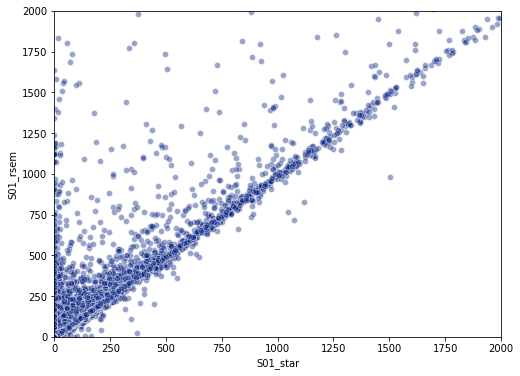

In [446]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
sns.scatterplot(x=compare.S01_star,y=compare.S01_rsem, alpha=0.4,ax=ax)
ax.axis(xmin=0,xmax=2000, ymin=0, ymax=2000);


In [431]:
import numpy as np

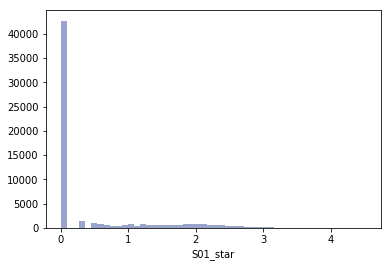

In [434]:
sns.distplot(a=np.log10(compare.S01_star+1), kde=False);

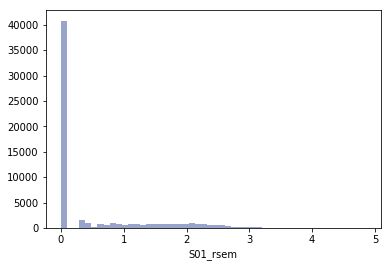

In [435]:
sns.distplot(a=np.log10(compare.S01_rsem+1), kde=False);

# Extract barcodes from undetermined R1 reads

In [5]:
os.chdir('/gpfs/commons/groups/sanjana_lab/cdai/TFscreen/data/20190816/original_fastq/Undetermined_fastq/')

In [6]:
ls *.fastq

toy.fastq                           Undetermined_R1_sans_polyG.tr.fastq
Undetermined_R1_sans_Phix.fastq     Undetermined_S0_R1_001.fastq
Undetermined_R1_sans_Phix.tr.fastq  Undetermined_S0_R2_001.fastq
Undetermined_R1_sans_polyG.fastq


# Recover undetermined R1 reads

In [13]:
barcodes = pd.read_csv('undetermined_barcode_counts.csv')

In [41]:
barcodes.head()

,barcode,reads
0,ACGTTCTA+TTTGAGAG,2717247
1,ACGTTCTA+TGTGGATA,2375002
2,AACCAGTT+TTTGAGAG,2243638
3,TTCCATCC+TGTGGATA,1979287
4,CTCTGGTA+TGTGGATA,1924574


In [28]:
i7 = barcodes.barcode.str.split('+', expand=True)[0].unique()

In [29]:
i5 = barcodes.barcode.str.split('+', expand=True)[1].unique()

In [42]:
i7.shape
i5.shape

(36211,)

(14879,)

In [43]:
i7[21:40]

array(['TCAACCTA', 'TTAGCCTC', 'TTATCCTA', 'GTGTGGTG', 'TAACTGTA',
       'GGGGGGGT', 'ACGTTCGA', 'AACCAGGT', 'TCCTAAAT', 'AAGAACTT',
       'TTGTGGTT', 'GTGTTGTT', 'TAACGGTA', 'AACCAACT', 'GAACTGTA',
       'TTATACTA', 'AACCACTT', 'GGGGGGTG', 'ATCTTGTA'], dtype=object)

In [44]:
[x for x in i5 if x[-5:]=='GAGAG']

['TTTGAGAG',
 'ATAGAGAG',
 'TTAGAGAG',
 'TGTGAGAG',
 'ATTGAGAG',
 'TGAGAGAG',
 'NTAGAGAG',
 'GTTGAGAG',
 'TTGGAGAG',
 'NNAGAGAG',
 'AAAGAGAG',
 'NTTGAGAG',
 'NNTGAGAG',
 'NNNGAGAG',
 'TCTGAGAG',
 'TATGAGAG',
 'NTNGAGAG',
 'AGAGAGAG',
 'TCAGAGAG',
 'GTAGAGAG',
 'ANAGAGAG',
 'TAAGAGAG',
 'ATNGAGAG',
 'GAGGAGAG',
 'ATGGAGAG',
 'AATGAGAG',
 'TGGGAGAG',
 'TTCGAGAG',
 'TNTGAGAG',
 'TAGGAGAG',
 'ACAGAGAG',
 'CTTGAGAG',
 'GGTGAGAG',
 'TTNGAGAG',
 'TNAGAGAG',
 'GTGGAGAG',
 'GGAGAGAG',
 'AGTGAGAG',
 'CTAGAGAG',
 'ANNGAGAG',
 'GGGGAGAG',
 'TNNGAGAG',
 'NGTGAGAG',
 'TGCGAGAG',
 'AGGGAGAG',
 'AAGGAGAG',
 'CGTGAGAG',
 'NGAGAGAG',
 'ACTGAGAG',
 'CGAGAGAG',
 'ATCGAGAG',
 'CGCGAGAG',
 'CTCGAGAG',
 'NAAGAGAG',
 'NGNGAGAG',
 'CACGAGAG',
 'GATGAGAG',
 'GAAGAGAG',
 'TCCGAGAG',
 'ANTGAGAG',
 'GCTGAGAG',
 'GCAGAGAG',
 'NATGAGAG',
 'GGCGAGAG',
 'NANGAGAG',
 'ACGGAGAG',
 'TGNGAGAG',
 'AANGAGAG',
 'NTGGAGAG',
 'TCGGAGAG',
 'TNGGAGAG',
 'GTNGAGAG',
 'NNGGAGAG',
 'CCTGAGAG',
 'TACGAGAG',
 'CCAGAGAG',
 'CTGGAGAG',

In [39]:
[x for x in i7 if x[-4:]=='TCCG']

['TCTATCCG',
 'TCGTTCCG',
 'TCGCTCCG',
 'TCTTTCCG',
 'AAGCTCCG',
 'TTGCTCCG',
 'TCAATCCG',
 'GCGTTCCG',
 'TCGATCCG',
 'ACGCTCCG',
 'GCGCTCCG',
 'ATGCTCCG',
 'TATATCCG',
 'CCGCTCCG',
 'TAGCTCCG',
 'TCTCTCCG',
 'GCGATCCG',
 'ACTATCCG',
 'GCTTTCCG',
 'ACAATCCG',
 'NNTATCCG',
 'CTGCTCCG',
 'ACGTTCCG',
 'TTGGTCCG',
 'NCTATCCG',
 'GTGCTCCG',
 'TCGGTCCG',
 'GCTCTCCG',
 'NNNATCCG',
 'NNNNTCCG',
 'TCCCTCCG',
 'GTGTTCCG',
 'TTTATCCG',
 'TTGTTCCG',
 'GCTATCCG',
 'GGGTTCCG',
 'CAGCTCCG',
 'TAAATCCG',
 'AATATCCG',
 'TGGTTCCG',
 'TCCATCCG',
 'GTGGTCCG',
 'TCCTTCCG',
 'TGTTTCCG',
 'GCGGTCCG',
 'ATGGTCCG',
 'ACGGTCCG',
 'CCTATCCG',
 'TCACTCCG',
 'TGTATCCG',
 'TCTGTCCG',
 'ACGATCCG',
 'CCGGTCCG',
 'TCTNTCCG',
 'GTCTTCCG',
 'GGGGTCCG',
 'TTTTTCCG',
 'TCATTCCG',
 'GCCCTCCG',
 'GCCTTCCG',
 'CCGTTCCG',
 'ATGTTCCG',
 'TGGCTCCG',
 'AAGGTCCG',
 'NNTNTCCG',
 'TTCCTCCG',
 'CTGGTCCG',
 'ACCATCCG',
 'GGGCTCCG',
 'CCGATCCG',
 'NCNATCCG',
 'GAGCTCCG',
 'GCCATCCG',
 'TGGGTCCG',
 'AAAATCCG',
 'ACTCTCCG',
 'TTCTTCCG',

# combining 2 batches of RNAseq read counts

In [177]:
cnt_batch1 = pd.read_csv('/c/groups/sanjana_lab/cdai/TFscreen/data/H2HY7BGXC/rsem_results/rsem_counts.csv')
cnt_batch2 = pd.read_csv('/c/groups/sanjana_lab/cdai/TFscreen/data/HFJM7BGXC/rsem_output/rsem_counts.csv')
all(cnt_batch1.gene_id == cnt_batch2.gene_id) # check if gene_ids are the same

#combining counts
cnt_combined = pd.merge(cnt_batch1.iloc[:, 0:23], cnt_batch2, 'inner', on='gene_id', suffixes=('_B1', '_B2'))
#reorder columns
names = ['gene_id', 'gene_name'] + list(cnt_combined.columns[1:45].sort_values()) 
cnt_combined = cnt_combined[names]

True

In [178]:
cnt_combined.tail()

,gene_id,gene_name,S01_B1,S01_B2,S02_B1,S02_B2,S03_B1,S03_B2,S04_B1,S04_B2,S05_B1,S05_B2,S06_B1,S06_B2,S07_B1,S07_B2,S08_B1,S08_B2,S09_B1,S09_B2,S10_B1,S10_B2,S11_B1,S11_B2,S12_B1,S12_B2,S13_B1,S13_B2,S14_B1,S14_B2,S15_B1,S15_B2,S16_B1,S16_B2,S17_B1,S17_B2,S18_B1,S18_B2,S19_B1,S19_B2,S20_B1,S20_B2,S21_B1,S21_B2,S22_B1,S22_B2
60657,ENSG00000288107.1,AL731769.2,3.0001,10.0001,0.0001,7.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,17.0001,0.0001,0.0001,1.0001,2.0001,2.0001,1.0001,0.0001,0.0001,1.0001,3.0001,1.0001,0.0001,2.0001,1.0501,0.0001,0.0001,3.0001,0.0001,0.0001,2.0001,0.0001,3.0001,2.0001,1.0001,1.0001,0.0001,0.0001,1.0001,7.0001,1.0001,16.0001,3.0001
60658,ENSG00000288108.1,AC126768.3,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001
60659,ENSG00000288109.1,AC079331.3,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001
60660,ENSG00000288110.1,AC010941.1,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,3.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001
60661,ENSG00000288111.1,AC130888.1,0.0001,0.0001,0.0001,1.0001,8.0001,0.0001,0.0001,0.0001,0.0001,1.0001,0.0001,0.0001,0.0001,0.0001,3.0001,1.0001,5.0001,13.0001,3.7101,0.0001,3.0001,10.4401,5.2301,4.0001,4.0001,0.0001,0.0001,0.0001,2.0001,2.0001,14.0001,2.0001,0.0001,0.0001,9.0001,0.0001,0.0001,8.9901,0.0001,0.0001,0.0001,3.0001,5.0001,2.0001


In [179]:
cnt_combined.to_csv('/c/groups/sanjana_lab/cdai/TFscreen/rsem_counts_B1B2_combined.csv', index=False)

In [182]:
!bash ../../../syncDropbox